### Analysis
As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.
##### Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import json
import os
from datetime import datetime

import time
from pprint import pprint

from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [38]:
api_key

'6d1e5f37245a6608f4b7904270dd5a4a'

In [39]:
citipy

<module 'citipy.citipy' from 'C:\\Users\\Vijayalaskmi\\Anaconda3\\lib\\site-packages\\citipy\\citipy.py'>

In [40]:
coordinates = [(200, 200), (23, 200), (42, 100)]

## Generate Cities List
Your objective is to build a series of scatter plots to showcase the following relationships:


1. Temperature (F) vs. Latitude

2. Humidity (%) vs. Latitude

3. Cloudiness (%) vs. Latitude

4. Wind Speed (mph) vs. Latitude

In [159]:
# List for holding lat_lngs and cities
# n = 500
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['alofi',
 'puerto ayora',
 'chapais',
 'ushuaia',
 'toftir',
 'popondetta',
 'vardo',
 'hilo',
 'namibe',
 'phan rang',
 'mataura',
 'neuquen',
 'rikitea',
 'porto novo',
 'upernavik',
 'new norfolk',
 'hermanus',
 'amahai',
 'khatanga',
 'qaanaaq',
 'la concordia',
 'banda aceh',
 'iralaya',
 'genhe',
 'broome',
 'belushya guba',
 'ponta do sol',
 'raudeberg',
 'caravelas',
 'bathsheba',
 'hithadhoo',
 'illoqqortoormiut',
 'san gil',
 'butaritari',
 'flinders',
 'igrim',
 'bluff',
 'labutta',
 'atuona',
 'bandarbeyla',
 'jagdalpur',
 'kaele',
 'albany',
 'jamestown',
 'ixtapa',
 'nova odesa',
 'sorong',
 'omsukchan',
 'carrboro',
 'siteki',
 'alberton',
 'lucea',
 'barrow',
 'vostok',
 'cape town',
 'aksarka',
 'lebu',
 'cherskiy',
 'naze',
 'yellowknife',
 'bambous virieux',
 'chokurdakh',
 'santa rosa',
 'samusu',
 'carnarvon',
 'kavieng',
 'nanakuli',
 'necochea',
 'lerwick',
 'nikolskoye',
 'fairbanks',
 'arona',
 'saint anthony',
 'baykit',
 'chaplynka',
 'bredasdorp',
 'vaini',

In [160]:
for each in enumerate(cities):
    print(each)

(0, 'alofi')
(1, 'puerto ayora')
(2, 'chapais')
(3, 'ushuaia')
(4, 'toftir')
(5, 'popondetta')
(6, 'vardo')
(7, 'hilo')
(8, 'namibe')
(9, 'phan rang')
(10, 'mataura')
(11, 'neuquen')
(12, 'rikitea')
(13, 'porto novo')
(14, 'upernavik')
(15, 'new norfolk')
(16, 'hermanus')
(17, 'amahai')
(18, 'khatanga')
(19, 'qaanaaq')
(20, 'la concordia')
(21, 'banda aceh')
(22, 'iralaya')
(23, 'genhe')
(24, 'broome')
(25, 'belushya guba')
(26, 'ponta do sol')
(27, 'raudeberg')
(28, 'caravelas')
(29, 'bathsheba')
(30, 'hithadhoo')
(31, 'illoqqortoormiut')
(32, 'san gil')
(33, 'butaritari')
(34, 'flinders')
(35, 'igrim')
(36, 'bluff')
(37, 'labutta')
(38, 'atuona')
(39, 'bandarbeyla')
(40, 'jagdalpur')
(41, 'kaele')
(42, 'albany')
(43, 'jamestown')
(44, 'ixtapa')
(45, 'nova odesa')
(46, 'sorong')
(47, 'omsukchan')
(48, 'carrboro')
(49, 'siteki')
(50, 'alberton')
(51, 'lucea')
(52, 'barrow')
(53, 'vostok')
(54, 'cape town')
(55, 'aksarka')
(56, 'lebu')
(57, 'cherskiy')
(58, 'naze')
(59, 'yellowknife')
(

cities

In [161]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

In [162]:
query_url
units

'metric'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.


* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [163]:
#calculating the values after declaring variables such as longitude, latitude, Max temp, Humidty, Wind speed
cloudiness = []
countries = []
humidities = []
lats = []
longs = []
maxtemps = []
city_result = []
windspeeds = []
dates=[]

print(f"Beginning Data Retrieval  ")
print("----------------------------")
# Loop through the list of cities and perform a request for data on each
#for city in cities:
for index,city in enumerate(cities):
    print(f"Processing Record {index}|{city}")
    try:
        response = requests.get(query_url + city).json()
        
        cloudiness.append(response['clouds']['all'])    
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        maxtemps.append(response['main']['temp_max'])
        windspeeds.append(response['wind']['speed'])
        city_result.append(city)

    except:
        print("City not found. Skipping...")
#         print(f"The latitude information received is: {lat}")
#         print(f"The temperature information received is: {temp}")
#         print(f"The longitue : {longs}")
print("----------------------------")
print("Data Retrieval Complete  ")
print("----------------------------")

Beginning Data Retrieval  
----------------------------
Processing Record 0|alofi
Processing Record 1|puerto ayora
Processing Record 2|chapais
Processing Record 3|ushuaia
Processing Record 4|toftir
City not found. Skipping...
Processing Record 5|popondetta
Processing Record 6|vardo
Processing Record 7|hilo
Processing Record 8|namibe
Processing Record 9|phan rang
City not found. Skipping...
Processing Record 10|mataura
Processing Record 11|neuquen
Processing Record 12|rikitea
Processing Record 13|porto novo
Processing Record 14|upernavik
Processing Record 15|new norfolk
Processing Record 16|hermanus
Processing Record 17|amahai
Processing Record 18|khatanga
Processing Record 19|qaanaaq
Processing Record 20|la concordia
Processing Record 21|banda aceh
Processing Record 22|iralaya
Processing Record 23|genhe
Processing Record 24|broome
Processing Record 25|belushya guba
City not found. Skipping...
Processing Record 26|ponta do sol
Processing Record 27|raudeberg
Processing Record 28|caravela

Processing Record 242|port elizabeth
Processing Record 243|provideniya
Processing Record 244|umm lajj
Processing Record 245|komsomolskiy
Processing Record 246|east london
Processing Record 247|marawi
Processing Record 248|oktyabrskiy
Processing Record 249|quepos
Processing Record 250|lata
Processing Record 251|ocampo
Processing Record 252|sambava
Processing Record 253|bakchar
Processing Record 254|aflu
City not found. Skipping...
Processing Record 255|coquimbo
Processing Record 256|samalaeulu
City not found. Skipping...
Processing Record 257|sistranda
Processing Record 258|tshane
Processing Record 259|acari
Processing Record 260|ilirska bistrica
Processing Record 261|srednekolymsk
Processing Record 262|vilyuysk
Processing Record 263|rawannawi
City not found. Skipping...
Processing Record 264|kaeo
Processing Record 265|novoseleznevo
Processing Record 266|turukhansk
Processing Record 267|barawe
City not found. Skipping...
Processing Record 268|honiton
Processing Record 269|castro
Process

Processing Record 476|qaqortoq
Processing Record 477|ancud
Processing Record 478|villa rica
Processing Record 479|pringsewu
Processing Record 480|berdigestyakh
Processing Record 481|muroto
Processing Record 482|vanavara
Processing Record 483|kommunisticheskiy
Processing Record 484|lahaina
Processing Record 485|thisted
Processing Record 486|znin
Processing Record 487|mangrol
Processing Record 488|bay roberts
Processing Record 489|bambanglipuro
Processing Record 490|elizabeth city
Processing Record 491|krishnarajpet
Processing Record 492|kuroiso
Processing Record 493|healdsburg
Processing Record 494|tsiroanomandidy
Processing Record 495|grand river south east
City not found. Skipping...
Processing Record 496|dubenskiy
City not found. Skipping...
Processing Record 497|kijang
Processing Record 498|campana
Processing Record 499|camabatela
Processing Record 500|kropotkin
Processing Record 501|yazman
Processing Record 502|sitka
Processing Record 503|esna
Processing Record 504|neyshabur
Proces

## Creating DataFrame

In [164]:
# # Assemble everything into a data frame
weather_df = pd.DataFrame()
weather_df["City"]=city_result
weather_df["Latitude"]=lats
weather_df["Longitude"]=longs
weather_df["Humidity"]=humidities
weather_df["Max Temp"]=maxtemps
weather_df["Cloudiness"]=cloudiness
weather_df["WindSpeed"]=windspeeds
weather_df["Date"]=dates
weather_df["Country"]=countries
   

weather_df.head()


,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,WindSpeed,Date,Country
0,alofi,-19.06,-169.92,78,24.00,0,8.70,1540094400,NU
1,puerto ayora,-0.74,-90.35,100,21.18,12,6.46,1540095511,EC
2,chapais,49.78,-74.86,86,-3.00,90,6.20,1540094400,CA
3,ushuaia,-54.81,-68.31,80,4.00,90,6.70,1540090800,AR
4,popondetta,-8.77,148.24,77,26.50,36,0.66,1540095514,PG


In [165]:
# Finding the unique cities by using drop function
weather_df = weather_df.dropna(how='any')

print(f"The data frame contains {len(weather_df['City'])} unique cities.")

The data frame contains 548 unique cities.


In [166]:
weather_df.dtypes

City           object
Latitude      float64
Longitude     float64
Humidity        int64
Max Temp      float64
Cloudiness      int64
WindSpeed     float64
Date            int64
Country        object
dtype: object

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [167]:
# Saving as CSV file
weather_df.to_csv("w_cities.csv", sep=',', encoding='utf-8')
weather_df.head()
                        

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,WindSpeed,Date,Country
0,alofi,-19.06,-169.92,78,24.00,0,8.70,1540094400,NU
1,puerto ayora,-0.74,-90.35,100,21.18,12,6.46,1540095511,EC
2,chapais,49.78,-74.86,86,-3.00,90,6.20,1540094400,CA
3,ushuaia,-54.81,-68.31,80,4.00,90,6.70,1540090800,AR
4,popondetta,-8.77,148.24,77,26.50,36,0.66,1540095514,PG


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

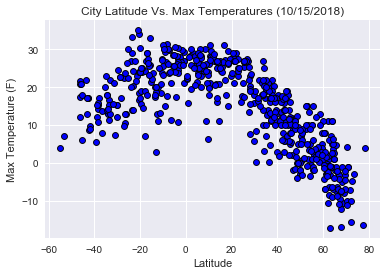

In [168]:
# PLOTTING lATTITUDE VS MAX TEMP
plt.scatter(weather_df["Latitude"],weather_df["Max Temp"],linewidths =.95, edgecolors = 'black', color = 'blue', s=35)
plt.title("City Latitude Vs. Max Temperatures (10/15/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

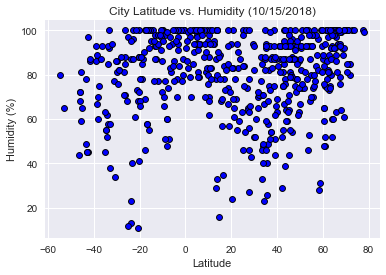

In [169]:
#Plotting Latitude vs Humidty 
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],linewidths =.95, edgecolors = 'black', color = 'blue', s=35)
plt.title("City Latitude vs. Humidity (10/15/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

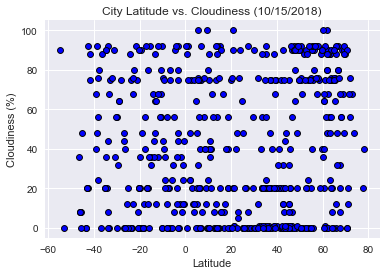

In [170]:
# Plotting Latitude vs Cloudiness
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],linewidths =.95, edgecolors = 'black', color = 'blue', s=35)
plt.title("City Latitude vs. Cloudiness (10/15/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

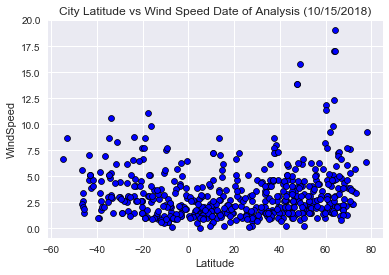

In [171]:
# Plotting Latitude Vs Wind Speed
plt.scatter(weather_df["Latitude"],weather_df["WindSpeed"], linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)
plt.title("City Latitude vs Wind Speed Date of Analysis (10/15/2018)")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
plt.grid(True)
plt.savefig("WindSpeed.png")
plt.show()